In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

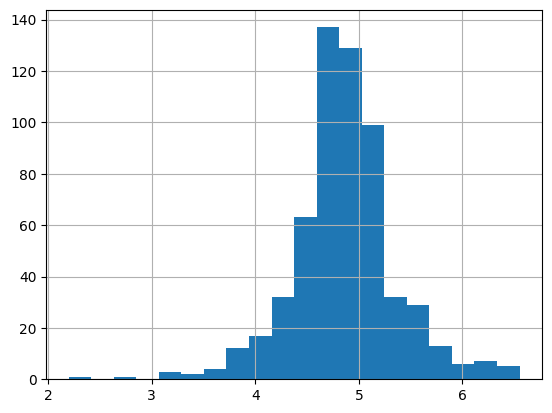

In [7]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20);

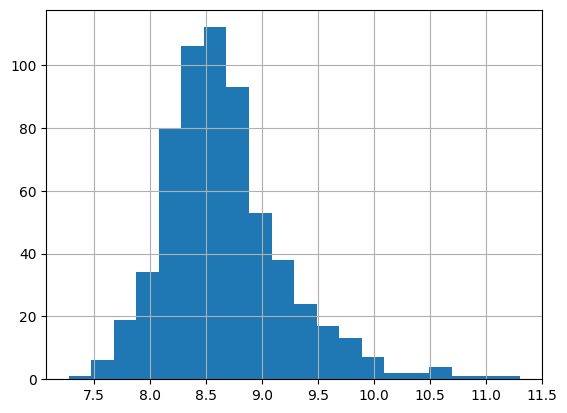

In [8]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=20);

In [12]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [20]:
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values

In [21]:
X[:5]

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.857444178729352,
        5849.0],
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0, 4.852030263919617,
        6091.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.189654742026425,
        3000.0],
       ['Male', 'Yes', '0', 'Not Graduate', 360.0, 1.0,
        4.787491742782046, 4941.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.948759890378168,
        6000.0]], dtype=object)

In [22]:
y[:5]

array(['Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, y_train.shape

((491, 8), (491,))

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [26]:
for i in range(0, 5):
  X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])

In [27]:
X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])

In [29]:
X_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.857444178729352, 381],
       [1, 1, 0, ..., 1.0, 4.857444178729352, 414]], dtype=object)

In [30]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [31]:
y_train[:20]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [32]:
for i in range(0, 5):
  X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])

In [33]:
X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

In [34]:
y_test = labelencoder_y.fit_transform(y_test)

In [36]:
X_test[:5]

array([[1, 1, 0, 0, 3, 1.0, 5.429345628954441, 109],
       [1, 1, 0, 0, 3, 1.0, 4.867534450455582, 37],
       [1, 1, 2, 0, 3, 1.0, 5.062595033026967, 71],
       [0, 0, 0, 0, 3, 1.0, 4.2626798770413155, 11],
       [1, 0, 0, 0, 3, 1.0, 4.248495242049359, 7]], dtype=object)

In [37]:
y_test[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score

print(f"The accuracy of Decision Tree is: {accuracy_score(y_test, y_pred)}")

The accuracy of Decision Tree is: 0.6504065040650406


In [42]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred_nb = nb_classifier.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
print(f"The accuracy of the Naive Bayes is :{accuracy_score(y_test, y_pred_nb)}")

The accuracy of the Naive Bayes is :0.7804878048780488


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion="entropy", random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [48]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [49]:
print(f"The accuracy of Random Forest is: {accuracy_score(y_test, y_pred_rf)}")

The accuracy of Random Forest is: 0.7642276422764228


In [50]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [52]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [53]:
test_df["Gender"].fillna(test_df["Gender"].mode()[0], inplace=True)
test_df["Dependents"].fillna(test_df["Dependents"].mode()[0], inplace=True)
test_df["Self_Employed"].fillna(test_df["Self_Employed"].mode()[0], inplace=True)
test_df["Loan_Amount_Term"].fillna(test_df["Loan_Amount_Term"].mode()[0], inplace=True)
test_df["Credit_History"].fillna(test_df["Credit_History"].mode()[0], inplace=True)

In [54]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

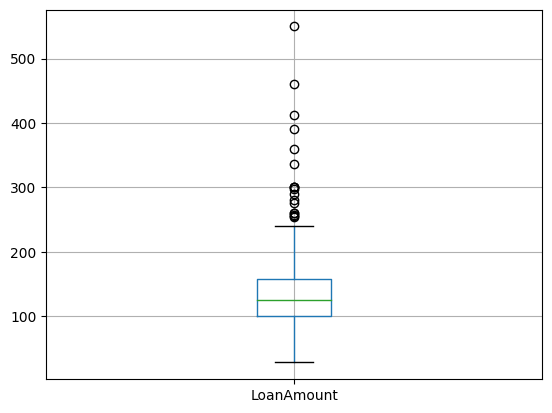

In [55]:
test_df.boxplot(column="LoanAmount");

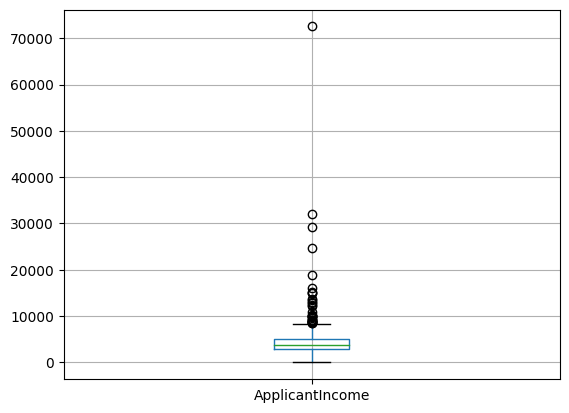

In [56]:
test_df.boxplot(column="ApplicantIncome");

In [57]:
test_df.LoanAmount = test_df.LoanAmount.fillna(test_df.LoanAmount.mean())

In [58]:
test_df["LoanAmount_log"] = np.log(test_df["LoanAmount"])

In [59]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [60]:
test_df["TotalIncome"] = test_df["ApplicantIncome"] + test_df["CoapplicantIncome"]
test_df["TotalIncome_log"] = np.log(test_df["TotalIncome"])

In [61]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [63]:
test = test_df.iloc[:, np.r_[1:5, 9:11, 13:15]].values

In [64]:
for i in range(0, 5):
  test[:, i] = labelencoder_X.fit_transform(test[:, i])

In [65]:
test[:, 7] = labelencoder_X.fit_transform(test[:, 7])

In [66]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [67]:
test = ss.fit_transform(test)

In [68]:
pred = nb_classifier.predict(test)

In [69]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,